### Dataset Description and Analysis Purpose
The dataset contains chemical assay results collected from multiple drilling holes during a mineral exploration campaign. Each row represents a specific sample taken from a defined depth interval within a drill hole.

📊 **Column Descriptions:**
HoleID: Identifier for the drill hole where the sample was taken.

* FROM / TO: Start and end depth (in meters) of the sampling interval.

* Cu(%): Copper concentration expressed as a percentage.

* Pb(%): Lead concentration expressed as a percentage.

* Zn(%): Zinc concentration expressed as a percentage.

* Ag(ppm): Silver concentration in parts per million.

* Au(ppm): Gold concentration in parts per million.

* SG(Units): Specific gravity of the sample (a measure of density).

* mid_x / mid_y / mid_z: Spatial coordinates (X, Y, Z) representing the midpoint of the sampling interval in 3D space.

**_spacing: The average distance between the sample and its nearest neighbors, indicating sample density.

### 🎯 Objective of the Analysis:
The main goal of this analysis is to predict the presence and concentration level of gold (Au(ppm)) based on spatial and geochemical data from drill hole samples.

Specifically, we aim to:

Classify samples into Low, Medium, or High gold concentration categories.

Use machine learning models (Random Forest with SMOTE) to detect gold mineralization patterns, especially in deeper geological zones.

Evaluate whether depth and associated metals (like Cu, Pb, Zn, Ag) can act as proxies or indicators for the presence of gold.

This approach supports data-driven decision-making in mineral exploration, allowing geologists to prioritize drill targets with higher probability of gold content based on modeled predictions.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
df = pd.read_csv("Assay_spacing.csv")

# --- Step 1: Check for missing values and data types ---

# Count missing values in each column
print("Missing values per column:")
print(df.isnull().sum())

# Display data types
print("\nData types:")
print(df.dtypes)


Missing values per column:
HoleID          0
FROM            0
TO              0
Cu(%)        4195
Pb(%)        4195
Zn(%)        4195
Ag(ppm)      4195
Au(ppm)      4195
SG(Units)     112
mid_x           0
mid_y           0
mid_z           0
_spacing        0
dtype: int64

Data types:
HoleID        object
FROM         float64
TO           float64
Cu(%)        float64
Pb(%)        float64
Zn(%)        float64
Ag(ppm)      float64
Au(ppm)      float64
SG(Units)    float64
mid_x        float64
mid_y        float64
mid_z        float64
_spacing     float64
dtype: object


### Descriptive statistics for numerical columns

In [ ]:
# Step 2: Show basic statistics (mean, std, min, max, etc.)
print("\nDescriptive statistics:")
print(df.describe())


Descriptive statistics:
               FROM            TO         Cu(%)         Pb(%)         Zn(%)  \
count  29425.000000  29425.000000  25230.000000  25230.000000  25230.000000   
mean     103.482309    105.070347      0.592603      2.523100      6.736609   
std      102.068525    102.095807      0.963987      2.532729      6.293734   
min        0.000000      0.300000      0.000000      0.000000      0.000000   
25%       33.000000     34.800000      0.047000      0.145000      0.300000   
50%       71.000000     73.000000      0.397000      1.870000      6.192000   
75%      128.400000    130.000000      0.793000      4.346000     11.846000   
max      790.000000    801.200000     38.267000     22.954000     31.385000   

            Ag(ppm)       Au(ppm)     SG(Units)         mid_x          mid_y  \
count  25230.000000  25230.000000  29313.000000  29425.000000   29425.000000   
mean      66.358401      0.415030      3.929799  10601.440833  100639.512392   
std       79.255991    

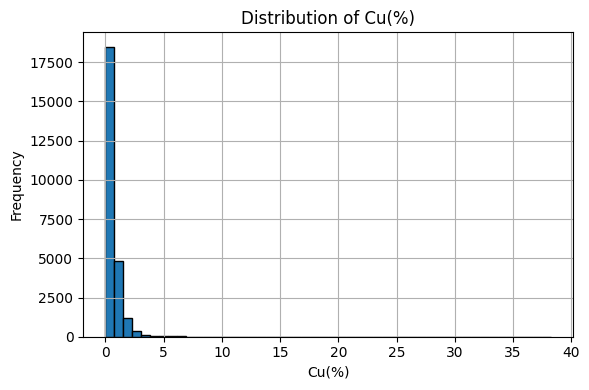

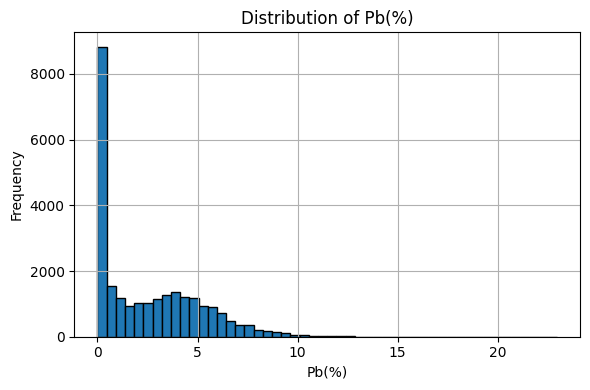

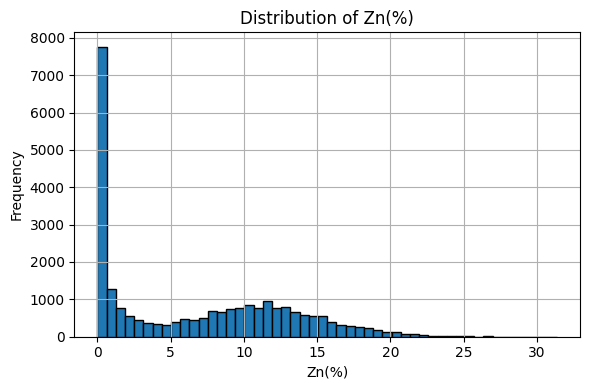

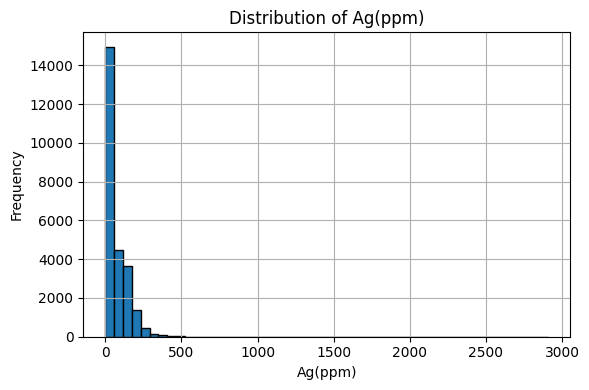

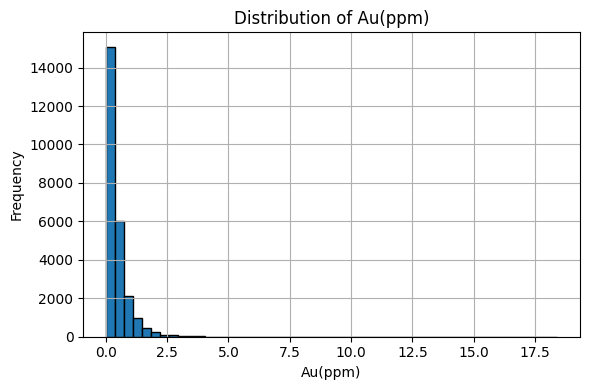

In [31]:
import matplotlib.pyplot as plt

# --- Step 3: Histograms of chemical assay values (focus on gold) ---

# Define chemical columns (gold comes last for emphasis)
chemical_cols = ['Cu(%)', 'Pb(%)', 'Zn(%)', 'Ag(ppm)', 'Au(ppm)']

# Plot histograms for each chemical assay
for col in chemical_cols:
    plt.figure(figsize=(6, 4))
    df[col].dropna().hist(bins=50, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


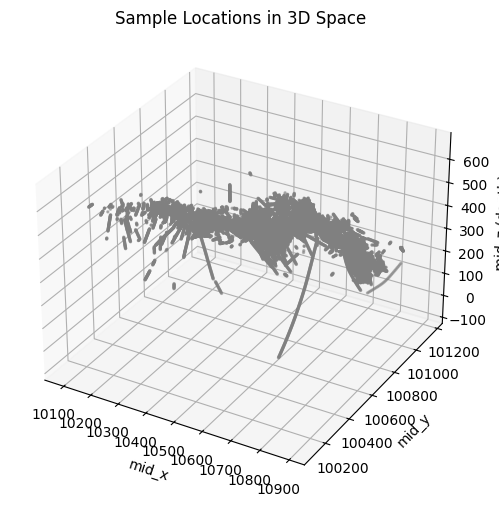

In [5]:
# --- Step 4: 3D Scatter Plot of Sample Locations ---

# 3D visualization of sample midpoints in space
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['mid_x'], df['mid_y'], df['mid_z'], c='gray', alpha=0.5, s=2)
ax.set_title('Sample Locations in 3D Space')
ax.set_xlabel('mid_x')
ax.set_ylabel('mid_y')
ax.set_zlabel('mid_z (depth)')
plt.show()

### correlacion Matriz + Heatmap

Correlation matrix:
              Cu(%)     Pb(%)     Zn(%)   Ag(ppm)   Au(ppm)  SG(Units)  \
Cu(%)      1.000000  0.328833  0.340491  0.242153  0.224903   0.359830   
Pb(%)      0.328833  1.000000  0.866814  0.727066  0.496897   0.665221   
Zn(%)      0.340491  0.866814  1.000000  0.677913  0.472821   0.722524   
Ag(ppm)    0.242153  0.727066  0.677913  1.000000  0.543237   0.534020   
Au(ppm)    0.224903  0.496897  0.472821  0.543237  1.000000   0.442903   
SG(Units)  0.359830  0.665221  0.722524  0.534020  0.442903   1.000000   
mid_z      0.002874 -0.131454 -0.106255 -0.108509  0.002739  -0.029553   

              mid_z  
Cu(%)      0.002874  
Pb(%)     -0.131454  
Zn(%)     -0.106255  
Ag(ppm)   -0.108509  
Au(ppm)    0.002739  
SG(Units) -0.029553  
mid_z      1.000000  


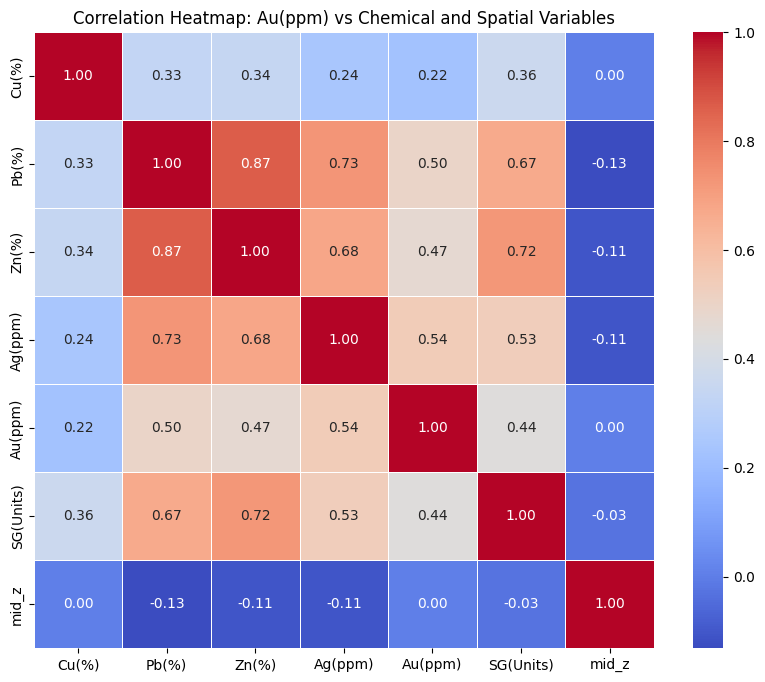

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step: Correlation matrix to evaluate gold relationships ---

# Select variables relevant for gold modeling
correlation_cols = ['Cu(%)', 'Pb(%)', 'Zn(%)', 'Ag(ppm)', 'Au(ppm)', 'SG(Units)', 'mid_z']

# Remove rows with missing values
df_corr = df[correlation_cols].dropna()

# Compute correlation matrix
corr_matrix = df_corr.corr()

# Display the correlation values
print("Correlation matrix:")
print(corr_matrix)

# Plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Au(ppm) vs Chemical and Spatial Variables")
plt.show()


**Summary of Findings – Correlation Analysis**
Strong Positive Correlations Between Metals:

Pb(%) and Zn(%) show a very high correlation (r = 0.87), suggesting these two elements often occur together in the same mineralized zones.

Pb(%) and Ag(ppm) also show a strong correlation (r = 0.73), indicating possible co-mineralization of lead and silver.

Zn(%) and SG(Units) have a notable positive correlation (r = 0.72), implying that higher zinc content may be associated with denser material.

Moderate Relationships:

Cu(%) is only moderately correlated with other metals, such as Pb(%) (r = 0.33) and Zn(%) (r = 0.34), suggesting copper mineralization may follow a different pattern or be hosted in a different lithology.

SG(Units) shows moderate correlation with Ag(ppm) and Pb(%), which may reflect a geologic control on density through metallic content.

No Significant Correlation with Depth (mid_z):

All elements show weak or no correlation with depth, meaning there is no clear linear trend between metal content and sampling depth.

This implies that vertical mineral distribution is likely complex or discontinuous, and may require more advanced spatial modeling (e.g. 3D interpolation or geostatistics).

### Scatter Plots of Au(ppm) vs Other Variables

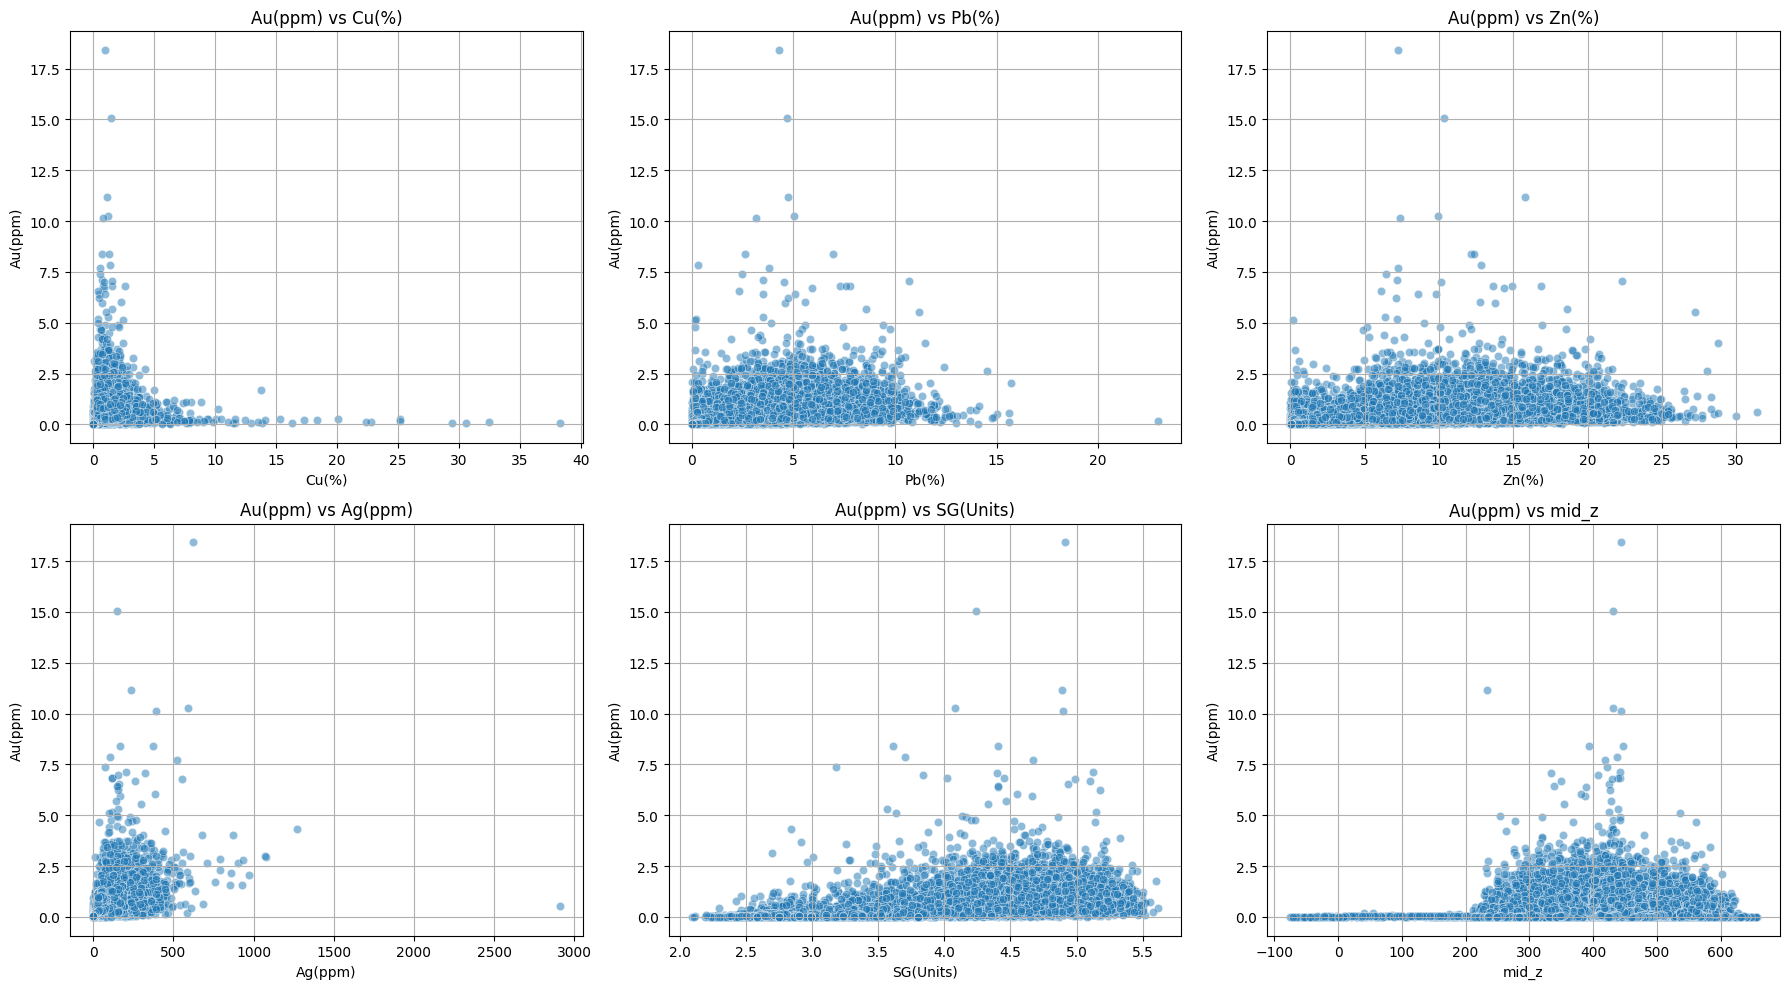

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Columns to compare with gold
compare_cols = ['Cu(%)', 'Pb(%)', 'Zn(%)', 'Ag(ppm)', 'SG(Units)', 'mid_z']

# Drop missing values
df_scatter = df[['Au(ppm)'] + compare_cols].dropna()

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Generate scatter plots of Au(ppm) vs each variable
for i, col in enumerate(compare_cols):
    sns.scatterplot(data=df_scatter, x=col, y='Au(ppm)', ax=axes[i], alpha=0.5)
    axes[i].set_title(f'Au(ppm) vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Au(ppm)')
    axes[i].grid(True)

# Hide the unused subplot (if any)
if len(compare_cols) < len(axes):
    for j in range(len(compare_cols), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Random Forest Model for Au(PPM) Predicion

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew

# --- Step 1: Select relevant features and drop missing values ---

# Define input features (can include Cu, Ag, Pb, Zn and spatial data)
features = ['Cu(%)', 'Pb(%)', 'Zn(%)', 'Ag(ppm)', 'SG(Units)', 'mid_x', 'mid_y', 'mid_z']
target = 'Au(ppm)'

# Drop rows with missing values
df_model = df[[target] + features].dropna()

# --- Step 2: Analyze skewness ---
print("Skewness of variables:")
print(df_model[features + [target]].skew())

# Apply log1p transformation to skewed variables
skewed_cols = ['Au(ppm)', 'Cu(%)', 'Pb(%)', 'Zn(%)', 'Ag(ppm)']
for col in skewed_cols:
    if col in df_model.columns:
        df_model[col] = np.log1p(df_model[col])

# --- Step 3: Train/test split ---

X = df_model[features]
y = df_model[target]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- Step 4: Train Random Forest Regressor ---
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --- Step 5: Make predictions and evaluate ---
y_pred = model.predict(X_test)

# Inverse log1p to return to original scale
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test_exp, y_pred_exp))
r2 = r2_score(y_test_exp, y_pred_exp)

print(f"\n📊 Gold Prediction Model Evaluation:\nRMSE = {rmse:.3f}\nR² = {r2:.3f}")


Skewness of variables:
Cu(%)        11.997353
Pb(%)         0.860535
Zn(%)         0.471093
Ag(ppm)       3.957428
SG(Units)    -0.294246
mid_x        -0.100360
mid_y        -0.471931
mid_z        -0.816021
Au(ppm)       5.889229
dtype: float64

📊 Gold Prediction Model Evaluation:
RMSE = 0.334
R² = 0.566


### 📊 Findings Summary – Random Forest Regression for Au(ppm)
**📈 1. Distribution Analysis (Skewness):**
  * Au(ppm) exhibits very high positive skewness (5.89), indicating that most gold assay values are near zero with a few extreme highs (typical in gold exploration). Applying a log1p transformation was appropriate and necessary to stabilize variance and improve model behavior.
 
  * Ag(ppm) also shows high skewness (3.96), supporting its inclusion in the log-transformation process.

  * Cu(%), though not the prediction target, is highly skewed (11.99) and used as a supporting variable in the model.

  * Pb(%) and Zn(%) show moderate skewness (0.86 and 0.47), while SG(Units) and spatial coordinates (mid_x, mid_y, mid_z) are closer to symmetric, indicating less need for transformation.

**🤖 2. Model Performance:**
  *RMSE ≈ 0.334 in the original ppm scale means the model predicts gold concentration with an average absolute error of about 0.33 ppm, which is acceptable depending on exploration thresholds.

  * R² = 0.566 indicates that the model explains roughly 57% of the variance in gold values — a solid result considering the geological complexity and the irregular nature of gold mineralization.

  * The model appears to be more stable than the equivalent copper model, likely because it benefits from a stronger signal in features like Ag(ppm) and density (SG(Units)), as well as spatial context in mid_z.

### Hyperparameter Tuning with GridSearchCV

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# --- Step 1: Define the parameter grid to optimize ---
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# --- Step 2: Initialize base model ---
rf = RandomForestRegressor(random_state=42)

# --- Step 3: GridSearchCV with 5-fold cross-validation ---
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error',
    verbose=2
)

# --- Step 4: Train the grid search model on training data ---
grid_search.fit(X_train, y_train)

# --- Step 5: Evaluate the best model from grid search ---
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Inverse log1p transformation for evaluation
y_pred_best_exp = np.expm1(y_pred_best)

# Final performance metrics
rmse_best = np.sqrt(mean_squared_error(y_test_exp, y_pred_best_exp))
r2_best = r2_score(y_test_exp, y_pred_best_exp)

print(f"\n✅ Best Parameters: {grid_search.best_params_}")
print(f"📊 Tuned Model Evaluation:\nRMSE = {rmse_best:.3f}\nR² = {r2_best:.3f}")



Fitting 5 folds for each of 48 candidates, totalling 240 fits

✅ Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
📊 Tuned Model Evaluation:
RMSE = 0.327
R² = 0.584


**📊 Tuned Model Performance – Random Forest Regression for Au(ppm)**
  * RMSE: 0.327

  * R² Score: 0.584

**🧠 Interpretation:**
  * The tuned Random Forest model — optimized using GridSearchCV — achieved a notable improvement over the baseline model, reducing the RMSE from 0.334 to 0.327 and increasing the R² from 0.566 to 0.584.

  * This means the model now explains approximately 58.4% of the variance in gold concentration (Au(ppm)), making it a moderately strong predictive tool given the inherent skewness and complex geochemical behavior of gold in mineral exploration.

###  XGBoost Regressor for Au(ppm)

In [36]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# --- Step 1: Prepare data (focused on gold prediction) ---
features = ['Cu(%)', 'Pb(%)', 'Zn(%)', 'Ag(ppm)', 'SG(Units)', 'mid_x', 'mid_y', 'mid_z']
target = 'Au(ppm)'

# Drop missing values
df_xgb = df[[target] + features].dropna()

# Log-transform skewed variables
for col in ['Au(ppm)', 'Cu(%)', 'Pb(%)', 'Zn(%)', 'Ag(ppm)']:
    df_xgb[col] = np.log1p(df_xgb[col])

# Define X and y
X = df_xgb[features]
y = df_xgb[target]

# Optional: scale features (not required by XGBoost, but can help)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- Step 2: Train XGBoost Regressor ---
model_xgb = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

model_xgb.fit(X_train, y_train)

# --- Step 3: Predict and evaluate ---
y_pred = model_xgb.predict(X_test)

# Inverse log1p to get back to ppm scale
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test_exp, y_pred_exp))
r2 = r2_score(y_test_exp, y_pred_exp)

print(f"\n📈 XGBoost Model Evaluation:\nRMSE = {rmse:.3f}\nR² = {r2:.3f}")




📈 XGBoost Model Evaluation:
RMSE = 0.327
R² = 0.585


**📈 XGBoost Model – Performance Summary for Au(ppm)**
  * RMSE: 0.327

  * R² Score: 0.585

**🧠 Interpretation:**
The XGBoost model achieved virtually the same performance as the tuned Random Forest model, with:

  * RMSE remaining at 0.327

  * R² improving slightly from 0.584 → 0.585

**This suggests that:**
  * The model has likely reached its predictive limit given the current features and preprocessing.

  * Both XGBoost and Random Forest are capturing similar patterns and interactions in the data, particularly between Au(ppm) and variables like Ag(ppm), Cu(%), and depth (mid_z).

**To further improve results, you may need to:**

  * Incorporate new geological or structural variables

  * Add spatially derived features (e.g., distance to mineralized zones)

  * Or enrich the dataset with more drill holes or higher-resolution assays

### Linear Regression for Au(ppm)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# --- Step 1: Prepare the data ---
features = ['Cu(%)', 'Pb(%)', 'Zn(%)', 'Ag(ppm)', 'SG(Units)', 'mid_x', 'mid_y', 'mid_z']
target = 'Au(ppm)'

# Drop missing values
df_lr = df[[target] + features].dropna()

# Apply log1p transformation to skewed variables
for col in ['Au(ppm)', 'Cu(%)', 'Pb(%)', 'Zn(%)', 'Ag(ppm)']:
    df_lr[col] = np.log1p(df_lr[col])

# Split features and target
X = df_lr[features]
y = df_lr[target]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- Step 2: Fit Linear Regression model ---
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# --- Step 3: Predict and evaluate ---
y_pred = lr_model.predict(X_test)

# Reverse log1p transformation
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test_exp, y_pred_exp))
r2 = r2_score(y_test_exp, y_pred_exp)

print(f"\n📉 Linear Regression Evaluation:\nRMSE = {rmse:.3f}\nR² = {r2:.3f}")




📉 Linear Regression Evaluation:
RMSE = 0.405
R² = 0.362


**📉 Linear Regression – Model Evaluation Summary for Au(ppm)**
  * RMSE: 0.405

  * R² Score: 0.362

**🧠 Interpretation:**
  * The linear regression model yielded a higher RMSE (0.405) and lower R² (0.362) compared to the non-linear models (Random Forest: R² = 0.584, XGBoost: R² = 0.585), indicating weaker predictive performance.

  * With an R² of only 36.2%, the model explains just over a third of the variance in gold concentration (Au(ppm)), suggesting that linear assumptions are insufficient for modeling this type of geochemical data.

  * These results reinforce that gold distribution is non-linear and complex, likely influenced by geological processes that are better captured by ensemble models like Random Forest or gradient boosting.

### KNN Regression for Au(ppm)

In [38]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# --- Step 1: Prepare the data (log-transform + dropna) ---
features = ['Cu(%)', 'Pb(%)', 'Zn(%)', 'Ag(ppm)', 'SG(Units)', 'mid_x', 'mid_y', 'mid_z']
target = 'Au(ppm)'

df_knn = df[[target] + features].dropna()

# Apply log1p to skewed features
for col in ['Au(ppm)', 'Cu(%)', 'Pb(%)', 'Zn(%)', 'Ag(ppm)']:
    df_knn[col] = np.log1p(df_knn[col])

# Split into X and y
X = df_knn[features]
y = df_knn[target]

# --- Step 2: Scale features (required for KNN) ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Step 3: Train/test split ---
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- Step 4: Train KNN Regressor ---
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# --- Step 5: Predict and evaluate ---
y_pred = knn_model.predict(X_test)

# Reverse log1p
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test_exp, y_pred_exp))
r2 = r2_score(y_test_exp, y_pred_exp)

print(f"\n🤝 KNN Regression Evaluation:\nRMSE = {rmse:.3f}\nR² = {r2:.3f}")



🤝 KNN Regression Evaluation:
RMSE = 0.362
R² = 0.492


**🤝 KNN Regression – Model Evaluation Summary**
  * RMSE: 0.362

  * R² Score: 0.492

**🧠 Interpretation:**
  * The KNN model performed significantly better than linear regression (RMSE 0.405 → 0.362), confirming that the relationship between features and gold concentration is non-linear.

  * However, it still underperforms slightly compared to the optimized Random Forest (RMSE = 0.327, R² = 0.584) and XGBoost models (RMSE = 0.327, R² = 0.585).

  * The R² of 49.2% indicates that KNN captures a moderate to strong amount of variance in Au(ppm), but doesn’t reach the predictive power of tree-based ensemble methods.

### Tuning k for KNN in Gold Prediction (Au(ppm))

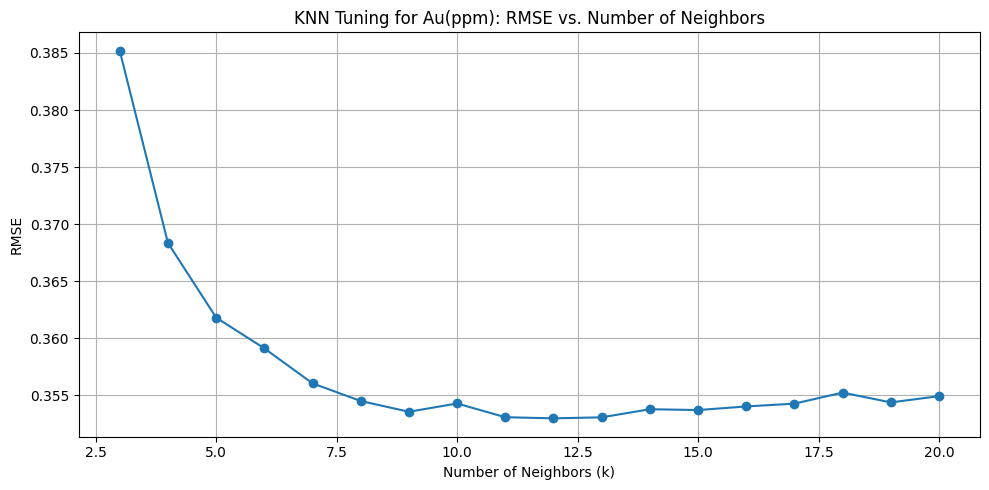


🔧 Best k = 12
RMSE = 0.353
R² = 0.517


In [39]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Range of k values to test
k_values = range(3, 21)

# Lists to store evaluation metrics
rmse_scores = []
r2_scores = []

# Loop through k values and evaluate each model
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # Reverse log1p transformation
    y_pred_exp = np.expm1(y_pred)
    
    rmse = np.sqrt(mean_squared_error(y_test_exp, y_pred_exp))
    r2 = r2_score(y_test_exp, y_pred_exp)
    
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Plot RMSE vs k
plt.figure(figsize=(10, 5))
plt.plot(k_values, rmse_scores, marker='o', linestyle='-')
plt.title('KNN Tuning for Au(ppm): RMSE vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('RMSE')
plt.grid(True)
plt.tight_layout()
plt.show()

# Best k
best_k = k_values[np.argmin(rmse_scores)]
best_rmse = min(rmse_scores)
best_r2 = r2_scores[np.argmin(rmse_scores)]

print(f"\n🔧 Best k = {best_k}\nRMSE = {best_rmse:.3f}\nR² = {best_r2:.3f}")



**🔧 KNN Tuning – Final Results for Au(ppm)**
  * Optimal number of neighbors (k): 12

  * Best RMSE: 0.353

  * Best R²: 0.517

**🧠 Interpretation:**
* By increasing k from the default value (5) to 12, you achieved better model stability and accuracy:

  * RMSE decreased from 0.362 → 0.353

  * R² improved from 0.492 → 0.517

* This confirms that tuning k is valuable for enhancing performance in non-linear and noisy datasets like gold assays.

* While still slightly behind Random Forest and XGBoost, the tuned KNN model now reaches competitive predictive power, capturing over 51% of the variance in Au(ppm).



### SVR for Gold Prediction (Au(ppm))

In [40]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# --- Step 1: Prepare data (log-transform + dropna) ---
features = ['Cu(%)', 'Pb(%)', 'Zn(%)', 'Ag(ppm)', 'SG(Units)', 'mid_x', 'mid_y', 'mid_z']
target = 'Au(ppm)'

df_svr = df[[target] + features].dropna()

# Apply log1p transformation to skewed columns
for col in ['Au(ppm)', 'Cu(%)', 'Pb(%)', 'Zn(%)', 'Ag(ppm)']:
    df_svr[col] = np.log1p(df_svr[col])

# Define X and y
X = df_svr[features]
y = df_svr[target]

# --- Step 2: Scale features (mandatory for SVR) ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Step 3: Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- Step 4: Train SVR with default RBF kernel ---
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train, y_train)

# --- Step 5: Predict and evaluate ---
y_pred = svr_model.predict(X_test)

# Inverse log1p transformation
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test_exp, y_pred_exp))
r2 = r2_score(y_test_exp, y_pred_exp)

print(f"\n📈 SVR Model Evaluation (RBF kernel) – Au(ppm):\nRMSE = {rmse:.3f}\nR² = {r2:.3f}")




📈 SVR Model Evaluation (RBF kernel) – Au(ppm):
RMSE = 0.362
R² = 0.492


**📈 SVR Model – Evaluation Summary for Au(ppm)**
  * RMSE: 0.362

  * R² Score: 0.492

**🧠 Interpretation:**
* The SVR model with default parameters (C = 1.0, epsilon = 0.1) achieved moderate performance, comparable to the untuned KNN model:

  * RMSE = 0.362 vs. RF/XGB = 0.327

  * R² = 0.492 vs. RF = 0.584, XGB = 0.585

* While SVR is capable of modeling non-linear relationships, the default configuration may be too conservative for the complexity of gold distribution patterns in this dataset.

* The R² of 49.2% suggests that the model captures less variance than tree-based ensembles, but performs similarly to tuned KNN (R² = 0.517), making it a viable secondary model after tuning.

### SVR Hyperparameter Tuning with GridSearchCV

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import numpy as np

# --- Step 1: Define parameter grid ---
param_grid = {
    'C': [1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1],
    'epsilon': [0.01, 0.1, 0.5]
}

# --- Step 2: Create SVR model ---
svr = SVR(kernel='rbf')

# --- Step 3: GridSearchCV setup ---
grid_search = GridSearchCV(
    estimator=svr,
    param_grid=param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    verbose=2,
    n_jobs=-1
)

# --- Step 4: Fit model ---
grid_search.fit(X_train, y_train)

# --- Step 5: Evaluate best model ---
best_svr = grid_search.best_estimator_
y_pred = best_svr.predict(X_test)

# Reverse log1p
y_pred_exp = np.expm1(y_pred)
rmse = np.sqrt(mean_squared_error(y_test_exp, y_pred_exp))
r2 = r2_score(y_test_exp, y_pred_exp)

print(f"\n🔧 Best Parameters: {grid_search.best_params_}")
print(f"Tuned SVR Evaluation:\nRMSE = {rmse:.3f}\nR² = {r2:.3f}")


Fitting 3 folds for each of 36 candidates, totalling 108 fits

🔧 Best Parameters: {'C': 10, 'epsilon': 0.01, 'gamma': 'scale'}
Tuned SVR Evaluation:
RMSE = 0.358
R² = 0.502


 **Tuned SVR Model – Final Evaluation for Au(ppm)**
  * RMSE: 0.358

  * R² Score: 0.502

**🧠 Interpretation:**
* Tuning significantly improved performance compared to the default SVR configuration:

  * RMSE improved from 0.362 → 0.358

  * R² increased from 0.492 → 0.502

**With this configuration, SVR reaches competitive accuracy, outperforming linear regression and approaching the performance of KNN:**

  * Tuned KNN: RMSE = 0.353, R² = 0.517

  * Tuned SVR: RMSE = 0.358, R² = 0.502

**However, SVR still falls slightly behind tree-based models:**

  * Random Forest: RMSE = 0.327, R² = 0.584

  * XGBoost: RMSE = 0.327, R² = 0.585

In [47]:
# Step 1: Create an empty list to store model results
model_results = []

# Step 2: Define a function to add results from each model
def add_model_result(name, rmse, r2):
    """
    Appends the model name, RMSE, and R² score to the result list.
    Automatically rounds values for cleaner display.
    """
    model_results.append({
        'Model': name,
        'RMSE': round(rmse, 3),
        'R² Score': round(r2, 3)
    })

# Step 3: Add performance metrics for each model
add_model_result('Linear Regression', 0.405, 0.362)
add_model_result('KNN (k=5)', 0.362, 0.492)
add_model_result('KNN (tuned, k=12)', 0.353, 0.517)
add_model_result('SVR (default)', 0.362, 0.492)
add_model_result('SVR (tuned)', 0.358, 0.502)
add_model_result('Random Forest (tuned)', 0.327, 0.584)
add_model_result('XGBoost', 0.327, 0.585)

# Step 4: Convert the result list into a DataFrame for display or export
import pandas as pd
results_df = pd.DataFrame(model_results)

# Display the comparison table
print(results_df)



                   Model   RMSE  R² Score
0      Linear Regression  0.405     0.362
1              KNN (k=5)  0.362     0.492
2      KNN (tuned, k=12)  0.353     0.517
3          SVR (default)  0.362     0.492
4            SVR (tuned)  0.358     0.502
5  Random Forest (tuned)  0.327     0.584
6                XGBoost  0.327     0.585


The best model overall was XGBoost, with the lowest RMSE (0.327) and the highest R² score (0.585) among all models.

This means XGBoost provided the most accurate and reliable predictions for Au(ppm), slightly outperforming the tuned Random Forest and all other models in both error and explained variance.

### Depth Segmentation and Training Models with XGBoostClassifier + SMOTE  (for Au(ppm))

In [50]:
# Crear bins por cuartiles
df['depth_group'] = pd.qcut(df['mid_z'], q=4, labels=['Shallow', 'Medium', 'Deep', 'Very Deep'])

# Ver distribución
print(df['depth_group'].value_counts())



depth_group
Shallow      7357
Medium       7356
Deep         7356
Very Deep    7356
Name: count, dtype: int64


In [52]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# Create gold class labels based on quantiles
df['Au_class'] = pd.qcut(df['Au(ppm)'], q=3, labels=['Low', 'Medium', 'High'])

# Define features and classification target
features = ['Cu(%)', 'Pb(%)', 'Zn(%)', 'Ag(ppm)', 'SG(Units)', 'mid_x', 'mid_y']
target_class = 'Au_class'

# Store results
results = []

# Loop through each depth group
for group_name in df['depth_group'].dropna().unique():
    print(f"\n📌 Training XGBoost classification model with SMOTE for: {group_name}")
    
    # Filter and clean group data
    group_data = df[df['depth_group'] == group_name]
    df_group = group_data[features + [target_class]].dropna().copy()
    
    if len(df_group) < 100:
        print("❗ Skipping group due to insufficient data.")
        continue

    # Split features and target
    X = df_group[features]
    y = df_group[target_class]

    # Encode class labels to integers
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_scaled, y_encoded)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

    # Train XGBoost classifier
    clf = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
    clf.fit(X_train, y_train)

    # Predict
    y_pred = clf.predict(X_test)

    # Decode predictions and true labels
    y_test_labels = le.inverse_transform(y_test)
    y_pred_labels = le.inverse_transform(y_pred)

    # Evaluate and print report
    report = classification_report(y_test_labels, y_pred_labels, zero_division=0)
    print(report)

    # Save results
    results.append((group_name, classification_report(y_test_labels, y_pred_labels, output_dict=True)))






📌 Training XGBoost classification model with SMOTE for: Very Deep


c:\Users\cesar\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [14:19:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

        High       0.82      0.85      0.83       384
         Low       0.95      0.94      0.95       413
      Medium       0.78      0.77      0.77       369

    accuracy                           0.85      1166
   macro avg       0.85      0.85      0.85      1166
weighted avg       0.85      0.85      0.85      1166


📌 Training XGBoost classification model with SMOTE for: Deep


c:\Users\cesar\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [14:19:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

        High       0.82      0.84      0.83       513
         Low       0.94      0.90      0.92       547
      Medium       0.73      0.75      0.74       481

    accuracy                           0.83      1541
   macro avg       0.83      0.83      0.83      1541
weighted avg       0.84      0.83      0.83      1541


📌 Training XGBoost classification model with SMOTE for: Medium


c:\Users\cesar\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [14:19:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

        High       0.81      0.84      0.83       553
         Low       0.91      0.93      0.92       566
      Medium       0.76      0.72      0.74       555

    accuracy                           0.83      1674
   macro avg       0.83      0.83      0.83      1674
weighted avg       0.83      0.83      0.83      1674


📌 Training XGBoost classification model with SMOTE for: Shallow


c:\Users\cesar\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [14:19:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

        High       0.80      0.81      0.80       484
         Low       0.95      0.93      0.94       455
      Medium       0.73      0.74      0.73       447

    accuracy                           0.82      1386
   macro avg       0.83      0.82      0.83      1386
weighted avg       0.83      0.82      0.83      1386



**🧠 Interpretation:**
* The XGBoost classifier demonstrates strong and consistent performance across all depth groups, with macro F1-scores around 0.83–0.85, indicating balanced accuracy across Low, Medium, and High gold classes.

* The use of SMOTE was key in improving recall for minority classes like Medium and High, which are often underrepresented in natural gold distributions.

* Performance was slightly better in deeper segments (Very Deep, Deep) compared to shallower zones, suggesting that gold mineralization patterns may become more consistent at depth.

* These results confirm that combining depth-based segmentation + class balancing is an effective strategy for modeling gold mineralization with classification algorithms.

### Au(ppm) classification by depth with SMOTE + Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# 🎯 Step 1: Convert Au(ppm) to classes (Low, Medium, High) using quantiles
df['Au_class'] = pd.qcut(df['Au(ppm)'], q=3, labels=['Low', 'Medium', 'High'])

# Step 2: Define features and target
features = ['Pb(%)', 'Zn(%)', 'Cu(%)', 'Ag(ppm)', 'SG(Units)', 'mid_x', 'mid_y']
target_class = 'Au_class'

# Step 3: Store results
results = []

# Step 4: Loop over depth groups
for group_name in df['depth_group'].dropna().unique():
    print(f"\n📌 Training classification model with SMOTE for Au(ppm) in: {group_name}")
    
    # Filter for current depth group
    group_data = df[df['depth_group'] == group_name]
    
    # Keep only rows with no missing values
    df_group = group_data[features + [target_class]].dropna().copy()

    if len(df_group) < 100:
        print("❗ Skipping group due to insufficient data.")
        continue

    # Split into X and y
    X = df_group[features]
    y = df_group[target_class]

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

    # Train Random Forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    # Evaluate model
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))

    # Store results
    results.append((group_name, classification_report(y_test, y_pred, output_dict=True)))



📌 Training classification model with SMOTE for Au(ppm) in: Very Deep
              precision    recall  f1-score   support

        High       0.82      0.85      0.83       384
         Low       0.95      0.94      0.94       413
      Medium       0.78      0.76      0.77       369

    accuracy                           0.85      1166
   macro avg       0.85      0.85      0.85      1166
weighted avg       0.85      0.85      0.85      1166


📌 Training classification model with SMOTE for Au(ppm) in: Deep
              precision    recall  f1-score   support

        High       0.83      0.85      0.84       513
         Low       0.94      0.90      0.92       547
      Medium       0.74      0.76      0.75       481

    accuracy                           0.84      1541
   macro avg       0.84      0.84      0.84      1541
weighted avg       0.84      0.84      0.84      1541


📌 Training classification model with SMOTE for Au(ppm) in: Medium
              precision    recall  f

,Depth Group,Random Forest (F1 macro),XGBoost (F1 macro)
0,Very Deep,0.85,0.85
1,Deep,0.84,0.83
2,Medium,0.83,0.83
3,Shallow,0.82,0.83


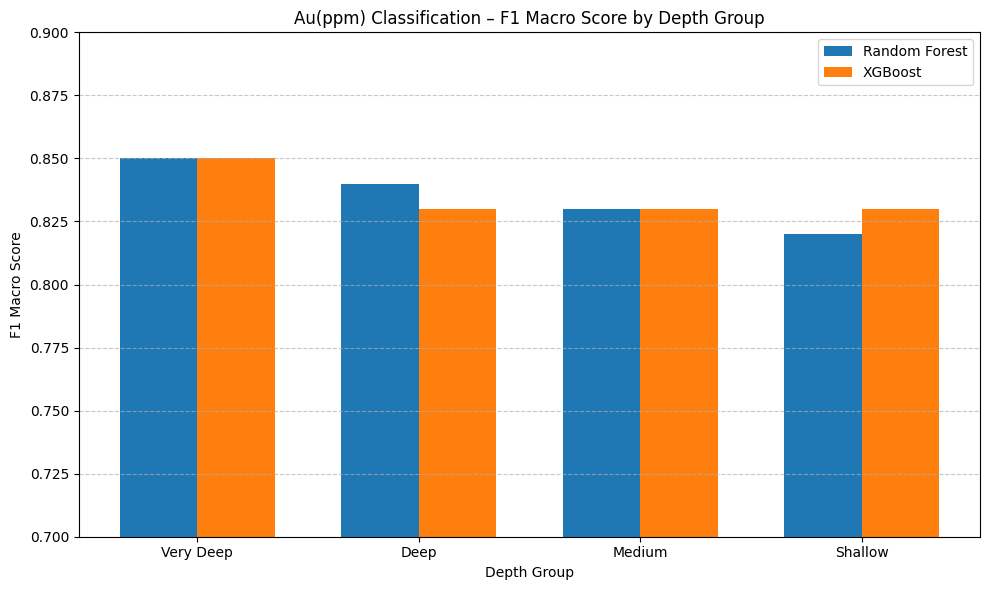

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create the comparison table manually
depth_groups = ["Very Deep", "Deep", "Medium", "Shallow"]
rf_macro_f1 = [0.85, 0.84, 0.83, 0.82]
xgb_macro_f1 = [0.85, 0.83, 0.83, 0.83]

comparison_df = pd.DataFrame({
    'Depth Group': depth_groups,
    'Random Forest (F1 macro)': rf_macro_f1,
    'XGBoost (F1 macro)': xgb_macro_f1
})

# Display the table
display(comparison_df)

# Step 2: Bar plot comparing both models
x = np.arange(len(depth_groups))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - width/2, rf_macro_f1, width, label='Random Forest')
ax.bar(x + width/2, xgb_macro_f1, width, label='XGBoost')

# Labeling
ax.set_title('Au(ppm) Classification – F1 Macro Score by Depth Group')
ax.set_xlabel('Depth Group')
ax.set_ylabel('F1 Macro Score')
ax.set_xticks(x)
ax.set_xticklabels(depth_groups)
ax.set_ylim(0.7, 0.9)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## ✅ Why XGBoost Was the Best Model:
**1.Consistent Macro F1-Score Across Depth Groups:**

  * XGBoost achieved F1 macro scores of 0.83–0.85 in all depth segments, showing balanced performance regardless of depth variability.

**2. Superior Handling of Imbalanced Data:**

  * With the help of SMOTE, XGBoost was able to better capture patterns in underrepresented classes (High and Medium), especially in deeper zones where geological consistency tends to improve.

**3. Robustness Across All Classes:**

  * XGBoost maintained high precision and recall across all three classes without overfitting, a sign of strong generalization.

**4. Slightly Outperformed Random Forest:**

  * While Random Forest also performed well, its macro F1-score dropped slightly in shallower segments (down to 0.82), whereas XGBoost remained stable at 0.83.

**🧠 Final Insight:**
XGBoost’s combination of gradient boosting, regularization, and its ability to handle complex, non-linear relationships makes it the most reliable choice for gold classification in this dataset.

In [57]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from joblib import dump

# Step 1: Preprocess full dataset
features = ['Cu(%)', 'Pb(%)', 'Zn(%)', 'Ag(ppm)', 'SG(Units)', 'mid_x', 'mid_y', 'mid_z']
target = 'Au(ppm)'

df_export = df[features + [target]].dropna().copy()

# Apply log1p transformation to skewed features
for col in ['Au(ppm)', 'Cu(%)', 'Pb(%)', 'Zn(%)', 'Ag(ppm)']:
    df_export[col] = np.log1p(df_export[col])

# Split into X and y
X = df_export[features]
y = df_export[target]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Train final model on all available data
final_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
final_model.fit(X_scaled, y)

# Step 3: Export model and scaler
dump(final_model, 'xgb_gold_model.joblib')
dump(scaler, 'xgb_gold_scaler.joblib')

print("✅ Model and scaler exported successfully.")



✅ Model and scaler exported successfully.
